## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## Initializations

### Constants

In [2]:
G = 6.6743E-11 
N = 3

m_sun = 1.9891*10**30
m_mars = 6.39*10**23
m_phobos = 10.6*10**15
m_vec = np.array([m_sun, m_mars, m_phobos]) 

# total time and time steps for two Earth years (seconds)
t = (365*24*3600) * 2        
dt = 1000

# total time and time steps for one Earth day (seconds)
# t = (24*3600)
# dt = 1    

### Initial Values

In [3]:
x_sun = np.array([0, 0, 0]) * 1000
x_mars = np.array([-1.515826990639941E+08, 1.938873525772750E+08, 7.781768685378343E+06]) * 1000
x_phobos = np.array([-1.515868463251353E+08, 1.938791518085351E+08, 7.783481232476845E+06]) * 1000
x_vec = np.array([x_sun, x_mars, x_phobos])

v_sun = np.array([0, 0, 0]) * 1000
v_mars = np.array([-1.817315960942974E+01, -1.286106056730962E+01, 1.762372061258093E-01]) * 1000
v_phobos = np.array([-1.654025112915708E+01, -1.391264769169599E+01, -7.317546220860613E-01]) * 1000
v_vec = np.array([v_sun, v_mars, v_phobos])

## Functions

In [4]:
def f_true(r, v, m, t_vec):
    """ 
    Returns the true velocity and acceleration of the bodies
    """
    a = np.zeros((N, 3))
    for i in range(N):
        for j in range(N):
            if (i != j):
                a[i] = a[i] + G*m[j]*(r[j] - r[i]) / np.linalg.norm(r[j] - r[i])**3
    
    u_dot_r = v
    u_dot_v = a

    return u_dot_r, u_dot_v

In [5]:
def RK4(r, v, m, T, dt):
    """ 
    Returns the position and velocity at the next time step via the fourth-order Runge-Kutta method
    """
    t_vec = np.arange(0, T, dt)
    x = np.zeros((int(t/dt) + 1, *x_vec.shape))
    v = np.zeros((int(t/dt) + 1, *v_vec.shape))
    x[0] = x_vec
    v[0] = v_vec
    
    for i in range(1, len(t_vec)):
        k1_r, k1_v = f_true(x[i-1], v[i-1], m, t_vec[i-1])
        k2_r, k2_v = f_true(x[i-1] + k1_r/2, v[i-1] + k1_v/2, m, t_vec[i-1] + dt/2)
        k3_r, k3_v = f_true(x[i-1] + k2_r/2, v[i-1] + k2_v/2, m, t_vec[i-1] + dt/2)
        k4_r, k4_v = f_true(x[i-1] + k3_r, v[i-1] + k3_v, m, t_vec[i-1] + dt)
        x[i] = x[i-1] + (dt / 6) * (k1_r + 2*k2_r + 2*k3_r + k4_r)
        v[i] = v[i-1] + (dt / 6) * (k1_v + 2*k2_v + 2*k3_v + k4_v)
    
    return x, v

In [6]:
def RK4_error(r, v, m, t, dt, dt_baseline):
    """ 
    Returns the error of the estimated function
    """
    x, v = RK4(r, v, m, t, dt)
    x_b, v_b = RK4(r, v, m, t, dt_baseline)
    
    x_b = x_b[~np.all(x_b == 0, axis=1)]
    v_b = v_b[~np.all(v_b == 0, axis=1)]
    
    err_x = np.linalg.norm(x[-1,:] - x_b[-1,:]) / np.linalg.norm(x_b[-1,:])
    err_v = np.linalg.norm(v[-1,:] - v_b[-1,:]) / np.linalg.norm(v_b[-1,:])
    return err_x, err_v

## Running the Model

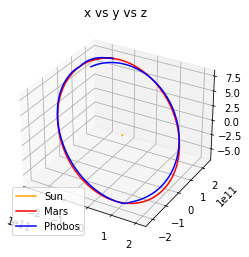

In [7]:
x, v = RK4(x_vec, v_vec, m_vec, t, dt)

x_mars = np.trim_zeros(x[:,1,0])
y_mars = np.trim_zeros(x[:,1,1])
z_mars = np.trim_zeros(x[:,1,2])

x_phobos = np.trim_zeros(x[:,2,0])
y_phobos = np.trim_zeros(x[:,2,1])
z_phobos = np.trim_zeros(x[:,2,2])

fig = plt.figure()
ax1 = fig.add_subplot(111, projection='3d')
ax1.plot(x[:,0,0], x[:,0,1], x[:,0,2], label='Sun', color = 'orange')
ax1.plot(x_mars, y_mars, z_mars, label='Mars', color = 'red')
ax1.plot(x_phobos, y_phobos, z_phobos, label='Phobos', color = 'blue')
ax1.legend()
plt.title("x vs y vs z")
plt.show()

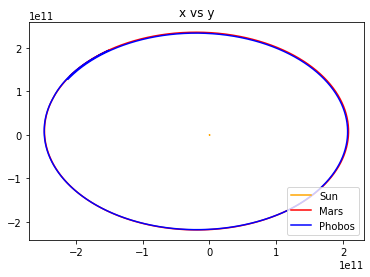

In [8]:
fig = plt.figure()
ax2 = fig.add_subplot(111)
ax2.plot(x[:,0,0], x[:,0,1], label='Sun', color = 'orange')
ax2.plot(x_mars, y_mars, label='Mars', color = 'red')
ax2.plot(x_phobos, y_phobos, label='Phobos', color = 'blue')
ax2.legend()
plt.title("x vs y")
plt.show()

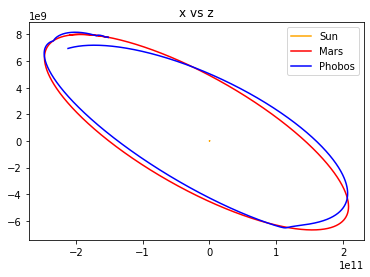

In [9]:
fig = plt.figure()
ax3 = fig.add_subplot(111)
ax3.plot(x[:,0,0], x[:,0,2], label='Sun', color = 'orange')
ax3.plot(x_mars, z_mars, label='Mars', color = 'red')
ax3.plot(x_phobos, z_phobos, label='Phobos', color = 'blue')
ax3.legend()
plt.title("x vs z")
plt.show()

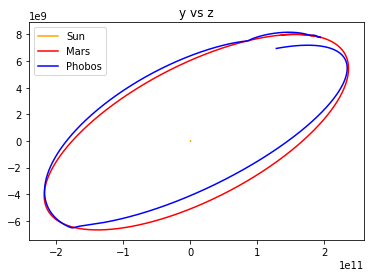

In [10]:
fig = plt.figure()
ax4 = fig.add_subplot(111)
ax4.plot(x[:,0,1], x[:,0,2], label='Sun', color = 'orange')
ax4.plot(y_mars, z_mars, label='Mars', color = 'red')
ax4.plot(y_phobos, z_phobos, label='Phobos', color = 'blue')
ax4.legend()
plt.title("y vs z")
plt.show()

## Graphing Error

In [11]:
dts = np.array([1e4, 5e4, 1e5])
dt_baseline = 1e3 
err_r = []
err_v = []
for time in dts:
    error_R, error_V= RK4_error(x, v, m_vec, t, time, dt_baseline)
    err_r.append(error_R)
    err_v.append(error_V)

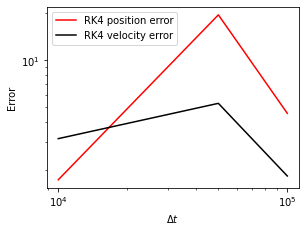

In [12]:
fig0 = plt.figure(figsize=(8, 6), tight_layout=True)
ax0 = fig0.add_subplot(221)
ax0.plot(dts, err_r, 'r', label='RK4 position error')
ax0.plot(dts, err_v, 'k-', label='RK4 velocity error')
ax0.set_xlabel('$\Delta t$')
ax0.set_ylabel('Error')
ax0.set_xscale('log')
ax0.set_yscale('log')
ax0.legend()